### Currency exchange
Currency Exchange is one of the biggest financial markets. It is a licensed business that allows customers to exchange one currency for another. Currently, 1 United States dollar is equivalent to 82.64 Indian rupees. Many factors affect exchange rates such as economic, political and even psychological factors.

### Currency Exchange Rate Prediction
The chnage in Exchnage Rates happen on a daily basis and it affects the income of a person, business and the economy of the country. Thus, predicting the currency exchange rates can help an individual as well as the country in many ways.

Here I will be predicting the exchange rate with Machine learning using Python.

### Data Extraction
The data that is used here has been taken from Yahoo Finance. Time period of the data: 1-11-2021 to 1-11-2022

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression


In [3]:
# reading the dataset 

sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_excel("C:\\Users\\Hi\\Downloads\\INR.xlsx")
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume
0 2021-11-01  74.928398  75.186302  74.810501  74.928299  74.928299       0
1 2021-11-02  74.829903  74.909302  74.613297  74.829903  74.829903       0
2 2021-11-03  74.712303  74.765503  74.407997  74.711998  74.711998       0
3 2021-11-04  74.435501  74.554001  74.235001  74.435501  74.435501       0
4 2021-11-05  74.478104  74.580498  74.050598  74.478104  74.478104       0


In [4]:
#length of the data
data.shape


(262, 7)

In [5]:
#checking non-null values 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       262 non-null    datetime64[ns]
 1   Open       262 non-null    float64       
 2   High       262 non-null    float64       
 3   Low        262 non-null    float64       
 4   Close      262 non-null    float64       
 5   Adj Close  262 non-null    float64       
 6   Volume     262 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.5 KB


In [6]:
#checking if columns have duplicate data
data.duplicated().sum()


0

### Preparing the dataset by storing the most relevant features in the variable x and storing the target column in the variable y

In [7]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)


### Taking a look at the correlation between the features before training the currency exchange rate prediction model


               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997521  0.997875  0.999901   0.999901     NaN
High       0.997521  1.000000  0.997420  0.997531   0.997531     NaN
Low        0.997875  0.997420  1.000000  0.997912   0.997912     NaN
Close      0.999901  0.997531  0.997912  1.000000   1.000000     NaN
Adj Close  0.999901  0.997531  0.997912  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


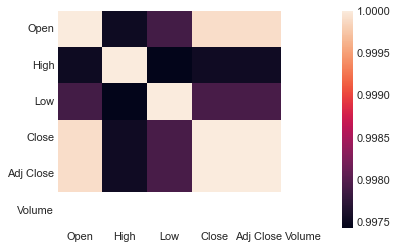

In [8]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

### Splitting the data

In [9]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 



In [10]:
print(len(xtrain),len(xtest))

209 53


### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print("R squared value of training data:",model.score(xtrain, ytrain))


R squared value of training data: 0.9999072552723401


In [13]:
np.mean(np.abs(ytest - y_pred))

0.01856094498517683

The R sqaure of the training data is very large, meaning that the model overfits

### Training a currency exchange prediction model using the Decision Tree Regression model


In [15]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred1 = model.predict(xtrain)
ypred1

array([79.221603, 75.917297, 76.490097, 80.050697, 74.4132  , 74.429802,
       74.378998, 77.497299, 78.955704, 79.453697, 74.623001, 79.878304,
       75.458504, 77.372398, 76.323502, 79.707497, 75.174797, 76.121696,
       79.477798, 77.365501, 78.134903, 76.914497, 76.463501, 77.598999,
       75.408302, 81.480598, 76.3088  , 77.82    , 74.643898, 74.711998,
       76.285202, 82.049599, 79.118301, 76.4673  , 76.794098, 82.2864  ,
       76.2659  , 75.599197, 78.6045  , 79.368401, 81.615799, 76.307098,
       74.191101, 74.255096, 77.443802, 78.939499, 76.527802, 75.039001,
       79.0439  , 75.068001, 79.355301, 77.724297, 75.826897, 74.458603,
       76.005997, 75.383301, 74.745003, 77.694199, 75.827797, 76.331398,
       75.050903, 77.421097, 76.134903, 79.331398, 82.541298, 74.056999,
       75.450699, 79.807503, 76.7537  , 79.895103, 79.883797, 75.685402,
       77.961403, 74.980301, 79.410599, 77.985497, 75.391296, 82.761497,
       77.478798, 74.928299, 79.8545  , 75.946404, 

In [17]:
#Prediction
ypred2 = model.predict(xtest)
ypred2


array([82.194702, 79.967903, 79.548798, 78.142403, 74.619698, 77.360497,
       78.962997, 82.2864  , 74.259804, 75.917297, 75.017899, 79.682297,
       74.4132  , 79.548798, 79.8545  , 82.832298, 74.980301, 73.972298,
       79.782997, 74.745003, 77.497299, 77.520897, 74.516998, 79.807503,
       75.458504, 77.630203, 75.039001, 74.829903, 76.490097, 74.259804,
       75.917297, 79.8545  , 79.649803, 75.917297, 76.167503, 79.724503,
       74.829903, 81.521301, 79.355301, 74.4049  , 82.194702, 74.478104,
       76.134903, 75.630997, 75.458504, 77.933998, 79.775902, 74.570297,
       75.391296, 77.82    , 82.412804, 78.142403, 75.917297])

### Model Performance Checks

In [18]:
# Mean Absolute Error of training data

np.mean(np.abs(ytrain - ypred1))



2.7623387031432434

In [19]:
# MAPE 

np.mean(np.abs(ytrain - ypred1)/ytrain)*100


3.5563787075347304

In [20]:
# Mean Absolute Error of test data

np.mean(np.abs(ytest - ypred2))


2.931643223567106

In [21]:
# MAPE 

np.mean(np.abs(ytest - ypred2)/ytest)*100

3.7723913153857604

The MAE of test data is more than the training data meaning that the model underfits the data